The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,Cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes ) 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. Often, we have only one observation per time period, like in stock or currency charts. While there is a seaborn function tsplot that is intended to be used with time series data, it is fairly specialized and (as of this writing's seaborn 0.8) is slated for major changes.

Instead, we will make use of Matplotlib's errorbar function, performing some processing on the data in order to get it into its necessary form.

Text(0, 0.5, 'Avg Combined Fuel Efficiency')

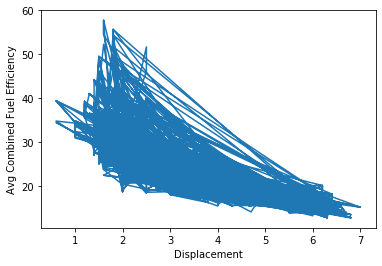

In [22]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement')
plt.ylabel('Avg Combined Fuel Efficiency')

In [31]:
bins_e = np.arange(0.6, 7+0.2, 0.2) #bin edges
bins_c = bins_e[:-1] + 0.1 #bin centres 
#Center values are needed so that the points are plotted in their accurate positions

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)

comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

<ErrorbarContainer object of 3 artists>

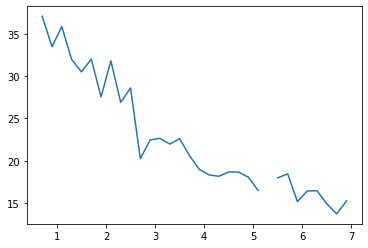

In [33]:
plt.errorbar( x = bins_c, y = comb_mean)

Text(0, 0.5, 'Avg Combined Fuel Efficiency')

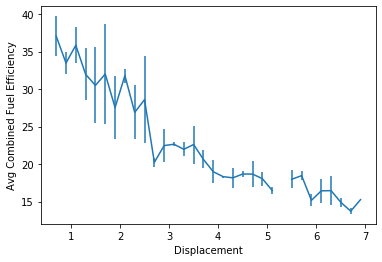

In [32]:
bins_e = np.arange(0.6, 7+0.2, 0.2) #bin edges
bins_c = bins_e[:-1] + 0.1 #bin centres 
#Center values are needed so that the points are plotted in their accurate positions

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)

comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()
plt.errorbar( x = bins_c, y = comb_mean, yerr = comb_std)
plt.xlabel('Displacement')
plt.ylabel('Avg Combined Fuel Efficiency')